In [2]:
import PoisDenoiser

import torch as th
import numpy as np
from time import time, sleep
from PoisDenoiser.dataset_loader import BSDS500
import PGM

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from time import time
from tqdm import tqdm

for i in tqdm(range(100)):
    start = time()
    while True:
        if time() - start > 0.2:
            break
            
        

100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


119082_1_maxval=1dot5
psnr : 5.892618179321289


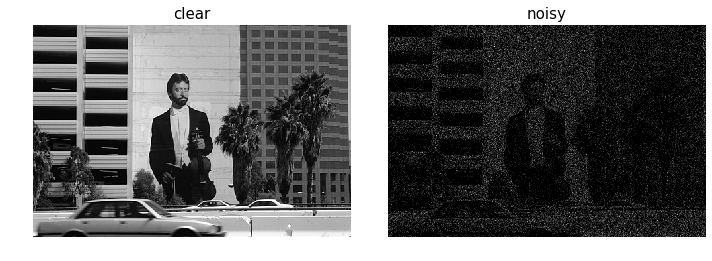

In [119]:
img_ind = 10
path2dataset = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
BSDSval = BSDS500(path2dataset+'val/', get_name=True)
    
clear, noisy, name = BSDSval[img_ind]

print(name)
images = [clear, noisy]
titles = ['clear', 'noisy']
PoisDenoiser.utils.show_images(images, titles)
print('psnr : {}'.format(PoisDenoiser.utils.psnr(clear, noisy)))

clear.unsqueeze_(0), noisy.unsqueeze_(0);

In [120]:
reg = PGM.reg_TV1_1_grad
# reg = PGM.reg_TV1_2_grad

if reg == PGM.reg_TV1_1_grad:
    lr0 = 0.05
    k = 0.01
    num_epochs = 20
        
elif reg == PGM.reg_TV1_2_grad:
    lr0 = 5
    k = 0.01
    num_epochs = 50

In [129]:
stdn=0.65

In [130]:
start = time()
    
img_estim_pois, psnrs_pois = PGM.do_denoise(noisy, reg=reg, \
                                 ref_image=clear, \
                                 num_epochs=num_epochs, \
                                 out_psnrs=True, \
                                 lr0_k=(lr0, k),\
                                 prox_type='pois')

print('time pois: ', np.float64(time()-start).round(2))
start = time()

img_estim_l2, psnrs_l2 = PGM.do_denoise(noisy, reg=reg, \
                                 ref_image=clear, \
                                 num_epochs=num_epochs, \
                                 out_psnrs=True, \
                                 lr0_k=(lr0, k),\
                                 prox_type='l2', stdn=th.Tensor([stdn]).type_as(noisy))

print('time l2: ', np.float64(time()-start).round(2))
start = time()

img_estim_noprox, psnrs_noprox = PGM.do_denoise(noisy, reg=reg, \
                                 ref_image=clear, \
                                 num_epochs=num_epochs, \
                                 out_psnrs=True, \
                                 lr0_k=(lr0, k),\
                                 prox_type='no_prox')

print('time no_prox: ', np.float64(time()-start).round(2))


100%|██████████| 20/20 [00:00<00:00, 394.65it/s]

time pois:  0.72
time l2:  0.06
time no_prox:  0.05


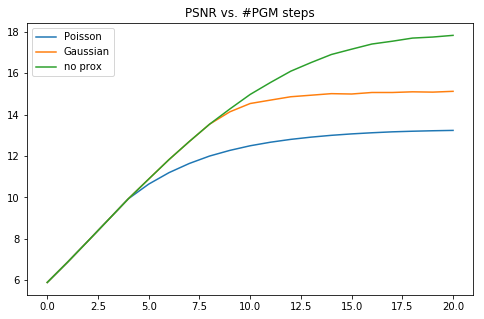

In [131]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(psnrs_pois, label='Poisson')
ax.plot(psnrs_l2, label='Gaussian')
ax.plot(psnrs_noprox, label='no prox')
plt.legend()
ax.set_title('PSNR vs. #PGM steps');

# slice_ = (slice(0,1), slice(0,1), \
#           slice(70,180), slice(170,280))

# slice_ = (slice(0,1), slice(0,1), slice(0,1000), slice(0,1000))

# PoisDenoiser.utils.show_images(
#     [noisy[slice_], clear[slice_]], ['noisy', 'clear'])  
# PoisDenoiser.utils.show_images(
#     [img_estim_pois[slice_], img_estim_l2[slice_], img_estim_noprox[slice_]], \
#     ['estim pois', 'estim l2', 'estim no_prox']) 
    

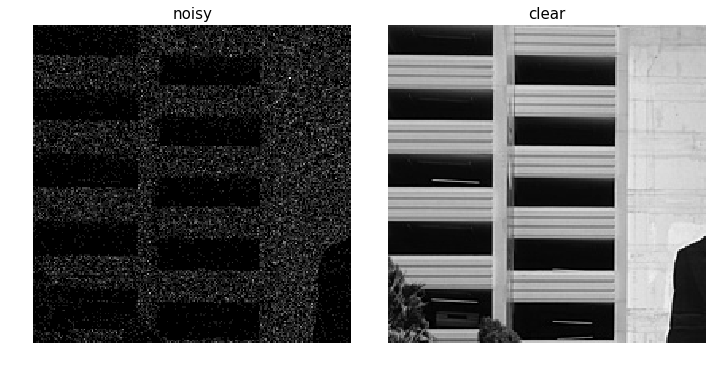

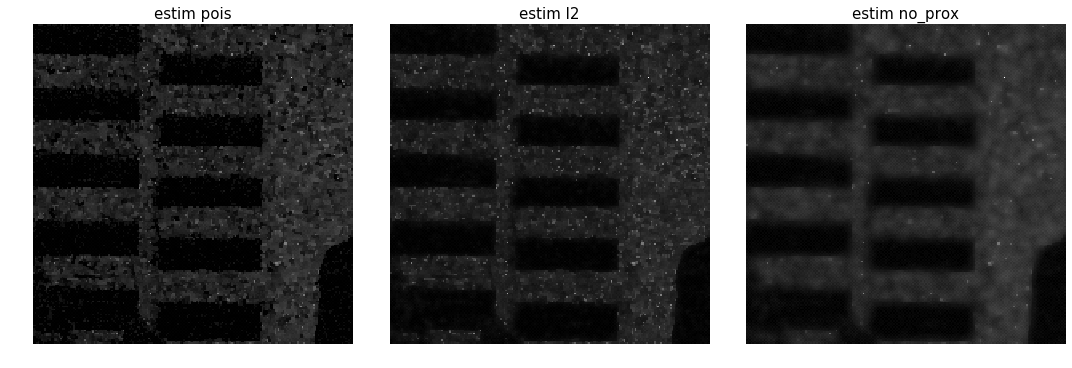

In [132]:
slice_ = (slice(0,1), slice(0,1), slice(0,200), slice(0,200))

PoisDenoiser.utils.show_images(
    [noisy[slice_], clear[slice_]], ['noisy', 'clear'])  
PoisDenoiser.utils.show_images(
    [img_estim_pois[slice_], img_estim_l2[slice_], img_estim_noprox[slice_]], \
    ['estim pois', 'estim l2', 'estim no_prox']) 